#Feature Selection

Upload the dataset

In [ ]:
# Upload dataset from local machine
from google.colab import files
uploaded = files.upload()

Saving Telco_Customer_Churn_Dataset.csv to Telco_Customer_Churn_Dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Handle missing values & encode categorical variables

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':  # categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # numeric
        df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-638905395.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-638905395.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() == 2:  # binary
        df[col] = label_enc.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

Split into train/test sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42, stratify=y)

Feature selection using SelectKBest (Chi-Square)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest to extract top 10 features
selector = SelectKBest(score_func=chi2, k=10)
fit = selector.fit(X_train, y_train)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': fit.scores_
}).sort_values(by='Score', ascending=False)

print("Top 10 Selected Features:")
print(feature_scores.head(10))

Top 10 Selected Features:
                                   Feature         Score
4                                   tenure  12501.193952
7                           MonthlyCharges   3090.537424
7067                     Contract_Two year    390.436350
7069        PaymentMethod_Electronic check    357.880512
7052           InternetService_Fiber optic    308.022809
7058  DeviceProtection_No internet service    231.646187
7056      OnlineBackup_No internet service    231.646187
7054    OnlineSecurity_No internet service    231.646187
7053                    InternetService_No    231.646187
7060       TechSupport_No internet service    231.646187


Correlation Heatmap of Top 10 Selected Features with Target (Churn)

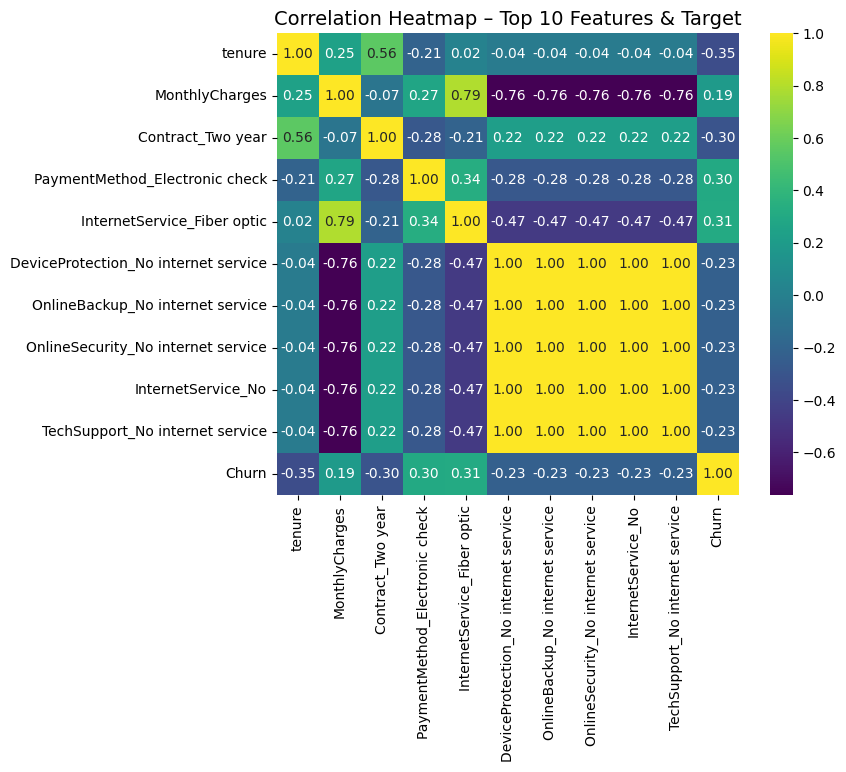

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure we are working only with top 10 features + target
top_features = feature_scores.head(10)['Feature'].tolist()
top_features_with_target = top_features + ['Churn']

# Create a smaller DataFrame for correlation calculation
df_top = df[top_features_with_target]

# Compute correlation matrix
corr_matrix_top = df_top.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_top, cmap='viridis', annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap – Top 10 Features & Target", fontsize=14)
plt.show()
